## Design 2D CNN Classification
### 1. One existing standard dataset from MNIST, CIFAR10, CIFAR100, MNIST-Fashion
### 2. Second should be a custom dataset (you design your own by taking pics from mobile or something, any multi-classification problem). Apply data augmentation, increase overall samples, apply same CNN model on this. 

#### Sub-tasks:
1. Comparative study with different hyperparameters (learning rate, epochs, batch size, optimizer, activation function, convo layer numbers, regularizer/dropout). Also train acc, train loss, val acc, val loss. 
2. Have a plot of accuracies and losses. 
3. Use CSVLogger class from keras if tensorflow

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.callbacks import EarlyStopping, CSVLogger
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import pickle
from myLogger import CSVLoggerV2
import datetime

In [16]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
print(f"Length of training data: {len(x_train)}")
print(f"Length of training labels: {len(y_train)}")
print(f"Length of testing data: {len(x_test)}")
print(f"Length of testing labels: {len(y_test)}")
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of testing data: {x_test.shape}")
print(f"Shape of training labels: {y_train.shape}")
print(f"Shape of testing labels: {y_test.shape}")

Length of training data: 60000
Length of training labels: 60000
Length of testing data: 10000
Length of testing labels: 10000
Shape of training data: (60000, 28, 28, 1)
Shape of testing data: (10000, 28, 28, 1)
Shape of training labels: (60000, 10)
Shape of testing labels: (10000, 10)


In [19]:
# Create and configure a CSVLogger
csv_logger = CSVLogger('MNIST_training.csv', separator=',', append=True)

# Create an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [39]:
mylogger = CSVLoggerV2('MNIST Comparative Study.csv', fieldnames=['batch_size', 'total_epochs', 'epoch', 'learning_rate', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
# Define hyperparameters
learning_rates = (0.0001, 0.001, 0.01)
epochs = (50, 25, 15)
batch_sizes = (32, 32, 32)

In [25]:
histories = []

for learning_rate, epoch, batch_size in zip(learning_rates, epochs, batch_sizes):
    # Create a Sequential model
    model = Sequential()

    # Add layers to the model
    model.add(Flatten(input_shape=(28, 28, 1)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    optim = Adam(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)
    model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        x_train, 
        y_train, 
        epochs=epoch, 
        batch_size=batch_size, 
        validation_data=(x_test, y_test),
        callbacks=[csv_logger, early_stopping],
        verbose=1
    )

    histories.append(history)

    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test accuracy: {test_accuracy * 100:.5f}%', end='\n\n')

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6202 - accuracy: 0.8482 - val_loss: 0.3184 - val_accuracy: 0.9135
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2936 - accuracy: 0.9195 - val_loss: 0.2535 - val_accuracy: 0.9295
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2408 - accuracy: 0.9342 - val_loss: 0.2161 - val_accuracy: 0.9390
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2071 - accuracy: 0.9425 - val_loss: 0.1926 - val_accuracy: 0.9453
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1818 - accuracy: 0.9491 - val_loss: 0.1731 - val_accuracy: 0.9510
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1621 - accuracy: 0.9547 - val_loss: 0.1581 - val_accuracy: 0.9559
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9590 - val_loss: 0.1466 - val_accuracy:

In [40]:
for history in histories:
    train_losses = history.history['loss']
    train_accuracies = history.history['accuracy']
    val_losses = history.history['val_loss']
    val_accuracies = history.history['val_accuracy']
    # print(f"{histories.index(history)} => {len(train_losses)} {len(train_accuracies)} {len(val_losses)} {len(val_accuracies)}")
    # Constants are batch size, epoch, learning rate. We get these by taking index of history in histories, and then using the values at the same index of the hyperparameter tuples
    epoch = 1
    for i in range(len(train_losses)):
        mylogger.log({
            'batch_size': batch_sizes[histories.index(history)],
            'total_epochs': epochs[histories.index(history)],
            'epoch': epoch,
            'learning_rate': learning_rates[histories.index(history)],
            'loss': train_losses[i],
            'accuracy': train_accuracies[i],
            'val_loss': val_losses[i],
            'val_accuracy': val_accuracies[i]
        })
        epoch += 1

In [ ]:
def get_last_df(losses, epochs):
    l = len(losses)
    return losses.iloc[l-epochs:, :]

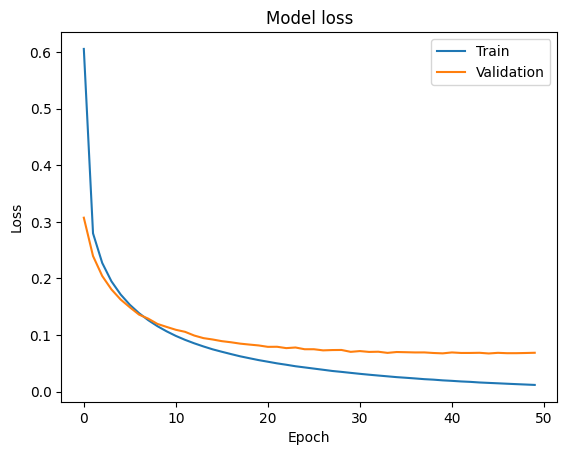

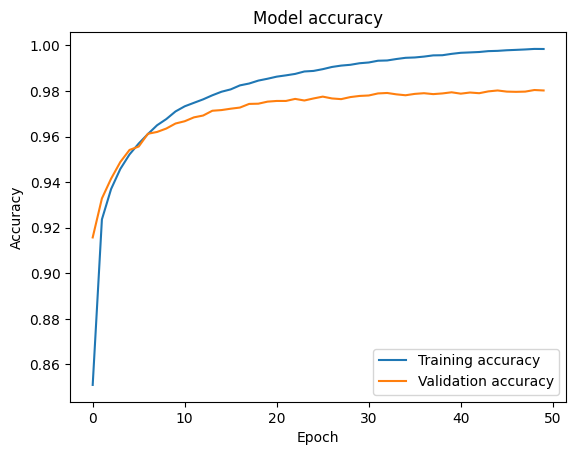

In [ ]:
losses = get_last_df(pd.read_csv('MNIST_training.csv', engine='pyarrow'), epochs)

# Plot the training and validation loss
plt.plot(losses["epoch"], losses['loss'], label='Training loss')
plt.plot(losses["epoch"], losses['val_loss'], label='Validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()


# Plot the training and validation accuracy
plt.plot(losses["epoch"], losses['accuracy'], label='Training accuracy')
plt.plot(losses["epoch"], losses['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
with open('ML_Lab5_Model.pkl', 'rb') as file:
    model = pickle.load(file)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.5f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0687 - accuracy: 0.9802
Test accuracy: 98.02000%
